In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 22

In [ ]:
passageiros = pd.read_csv('Passageiros.csv')
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


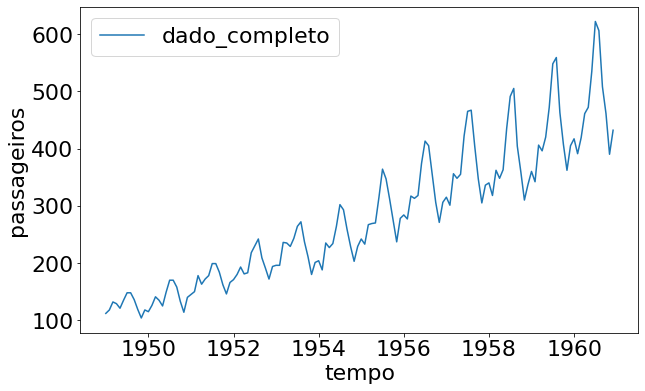

In [ ]:
sns.lineplot(x='tempo', y='passageiros', data = passageiros, label = 'dado_completo')

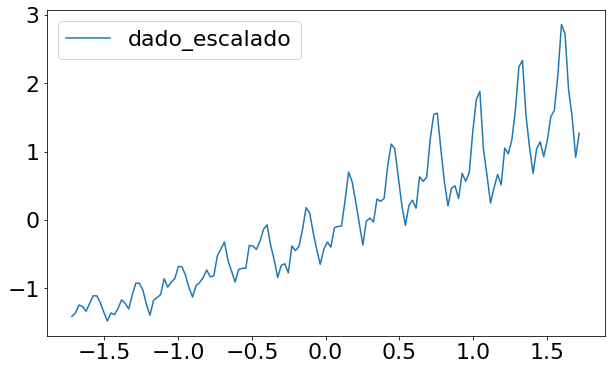

In [ ]:
sc = StandardScaler()
sc.fit(passageiros)
dado_escalado = sc.transform(passageiros)
x = dado_escalado[:,0]
y = dado_escalado[:,1]
sns.lineplot(x=x, y=y, label = 'dado_escalado')

In [ ]:
tamanho_treino = int(len(passageiros)*0.9)
tamanho_teste = len(passageiros)-tamanho_treino

xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]

xteste = x[tamanho_treino::]
yteste = y[tamanho_treino::]

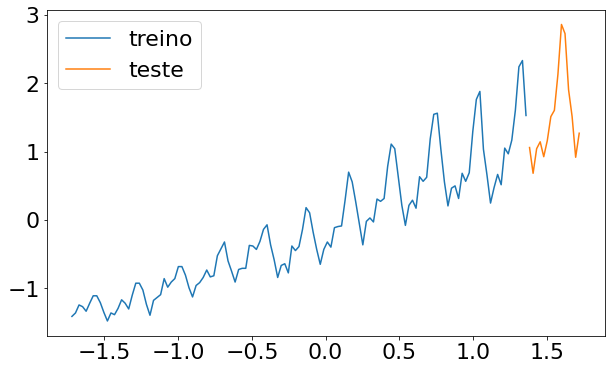

In [ ]:
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xteste,y=yteste,label='teste')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
regressor = Sequential()

In [ ]:
regressor.add(Dense(1,input_dim=1,kernel_initializer='Ones', use_bias=False, activation='linear'))

In [ ]:
regressor.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 1         
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [ ]:
regressor.fit(xtreino,ytreino)

5/5 [==============================] - 0s 3ms/step - loss: 0.1285


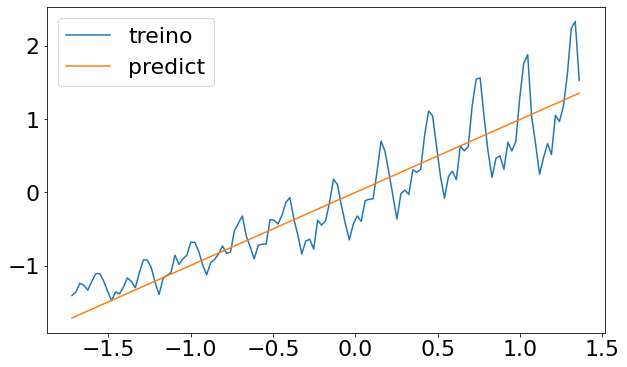

In [ ]:
y_predict = regressor.predict(xtreino)
sns.lineplot(x=xtreino,y=ytreino,label='treino')
sns.lineplot(x=xtreino,y=y_predict[:,0],label='predict')

In [ ]:
d = {'tempo': xtreino,
     'passageiros' : y_predict[:,0]}

In [ ]:
resultados = pd.DataFrame(data=d)
resultados.head()

,tempo,passageiros
0,-1.720064,-1.712143
1,-1.696007,-1.688197
2,-1.671950,-1.664251
3,-1.647894,-1.640305
4,-1.623837,-1.616359


In [ ]:
resultado_transf = sc.inverse_transform(resultados)
resultado_transf = pd.DataFrame(data=resultado_transf)
resultado_transf.columns = ['tempo', 'passageiros']
resultado_transf.head()

,tempo,passageiros
0,1949.000000,75.613506
1,1949.083333,78.476233
2,1949.166667,81.338974
3,1949.250000,84.201687
4,1949.333333,87.064428


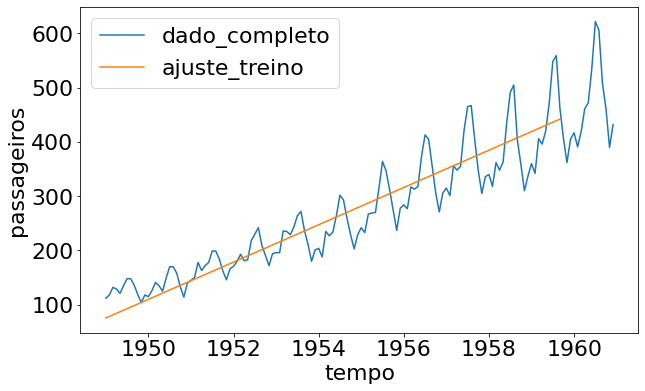

In [ ]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf, label='ajuste_treino')

In [ ]:
y_predict_teste = regressor.predict(xteste)
d = {'tempo': xteste,
     'passageiros' : y_predict_teste[:,0]}
resultados_teste = pd.DataFrame(data=d)
resultado_transf_teste = sc.inverse_transform(resultados_teste)
resultado_transf_teste = pd.DataFrame(data=resultado_transf_teste)
resultado_transf_teste.columns = ['tempo', 'passageiros']
resultado_transf_teste.head()

,tempo,passageiros
0,1959.750000,444.905510
1,1959.833333,447.768237
2,1959.916667,450.630964
3,1960.000000,453.493691
4,1960.083333,456.356432


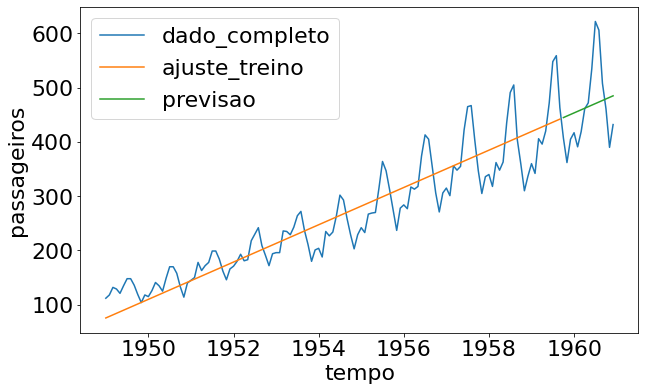

In [ ]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf, label='ajuste_treino')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf_teste, label='previsao')

In [ ]:
regressor2 = Sequential()
regressor2.add(Dense(8,input_dim=1, kernel_initializer='random_uniform', activation='linear', use_bias = False))
regressor2.add(Dense(8,kernel_initializer='random_uniform', activation='linear',use_bias=False))
regressor2.add(Dense(1,kernel_initializer='random_uniform', activation='linear',use_bias=False))

In [ ]:
regressor2.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
regressor2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 8         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 64        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 8         
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [ ]:
regressor2.fit(xtreino, ytreino, epochs=200)

Epoch 1/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8095
Epoch 2/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8088
Epoch 3/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8080
Epoch 4/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8068
Epoch 5/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8050
Epoch 6/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8026
Epoch 7/200
5/5 [==============================] - 0s 2ms/step - loss: 0.7992
Epoch 8/200
5/5 [==============================] - 0s 3ms/step - loss: 0.7949
Epoch 9/200
5/5 [==============================] - 0s 3ms/step - loss: 0.7894
Epoch 10/200
5/5 [==============================] - 0s 3ms/step - loss: 0.7828
Epoch 11/200
5/5 [==============================] - 0s 3ms/step - loss: 0.7747
Epoch 12/200
5/5 [==============================] - 0s 3ms/step - loss: 0.7648
Epoch 13/200
5/5 [==============================] - 0s 2ms/st

In [ ]:
y_predict = regressor2.predict(xtreino)
y_predict_teste = regressor2.predict(xteste)

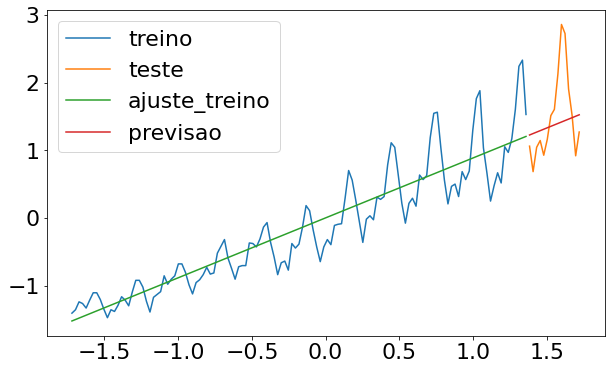

In [ ]:
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xteste, y=yteste, label='teste')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='ajuste_treino')
sns.lineplot(x=xteste, y=y_predict_teste[:,0], label='previsao')

In [ ]:
import numpy as np

vetor = pd.DataFrame(ytreino)[0]

def separa_dados(vetor, n_passos):
  X_novo, y_novo = [], []

  for i in range(n_passos, vetor.shape[0]):
    X_novo.append(list(vetor.loc[i-n_passos:i-1]))
    y_novo.append(vetor.loc[i])

  X_novo, y_novo = np.array(X_novo), np.array(y_novo)
  return X_novo, y_novo


In [ ]:
xtreino_novo, ytreino_novo = separa_dados(vetor,1)

In [ ]:
vetor2 = pd.DataFrame(yteste)[0]
xteste_novo, yteste_novo = separa_dados(vetor2,1)

In [ ]:
regressor3 = Sequential()
regressor3.add(Dense(8,input_dim=1, kernel_initializer='ones', activation='linear', use_bias=False))
regressor3.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor3.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))
regressor3.compile(loss='mean_squared_error', optimizer='adam')
regressor3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 8         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 64        
Total params: 584
Trainable params: 584
Non-trainable params: 0
_________________________________________________________________


In [ ]:
regressor3.fit(xtreino_novo, ytreino_novo, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9045
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8089
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7463
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7094
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6858
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6717
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6529
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6287
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6008
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5708
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5433
Epoch 12/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5109
Epoch 13/100
4/4 [==============================] - 0s 3ms/st

In [ ]:
y_predict_novo = regressor3.predict(xtreino_novo)

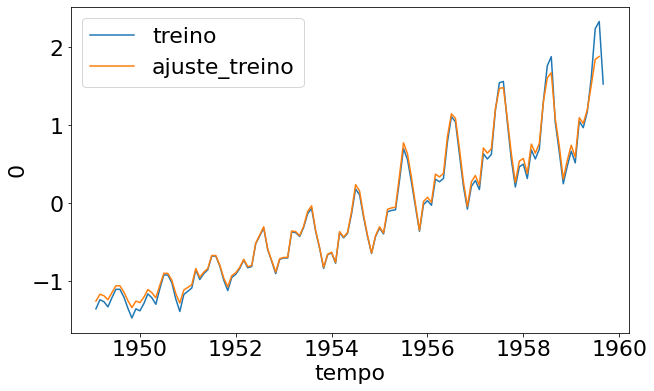

In [ ]:
sns.lineplot(x='tempo', y=ytreino_novo, data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label = 'ajuste_treino')

In [ ]:
y_predict_teste_novo = regressor3.predict(xteste_novo)

In [ ]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

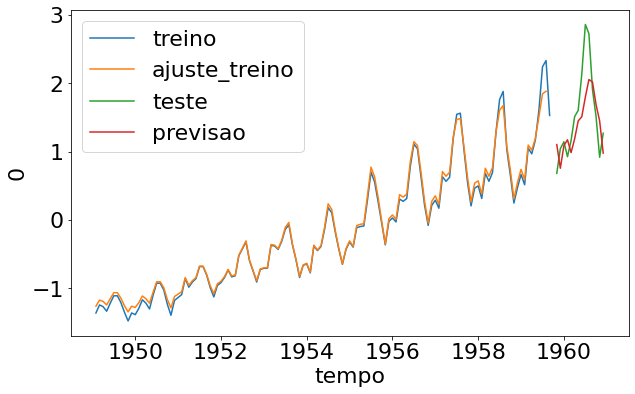

In [ ]:
sns.lineplot(x='tempo', y=ytreino_novo, data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label = 'ajuste_treino')
sns.lineplot(x='tempo', y=yteste_novo, data=passageiros[130:144], label = 'teste')
sns.lineplot(x='tempo', y=resultado.values, data=passageiros[130:144], label='previsao')

In [ ]:
xtreino_novo, ytreino_novo = separa_dados(vetor,4)
xteste_novo, yteste_novo = separa_dados(vetor2,4)

regressor4 = Sequential()
regressor4.add(Dense(8,input_dim=4, kernel_initializer='ones', activation='linear', use_bias=False))
regressor4.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor4.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))
regressor4.compile(loss='mean_squared_error', optimizer='adam')
regressor4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 8)                 32        
_________________________________________________________________
dense_8 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 64        
Total params: 608
Trainable params: 608
Non-trainable params: 0
_________________________________________________________________


In [ ]:
regressor4.fit(xtreino_novo, ytreino_novo, epochs=300)
y_predict_novo = regressor4.predict(xtreino_novo)
y_predict_teste_novo = regressor4.predict(xteste_novo)
resultado_treino = pd.DataFrame(y_predict_novo)[0]
resultado = pd.DataFrame(y_predict_teste_novo)[0]

Epoch 1/300
4/4 [==============================] - 0s 3ms/step - loss: 0.7601
Epoch 2/300
4/4 [==============================] - 0s 3ms/step - loss: 0.6613
Epoch 3/300
4/4 [==============================] - 0s 3ms/step - loss: 0.5778
Epoch 4/300
4/4 [==============================] - 0s 4ms/step - loss: 0.5111
Epoch 5/300
4/4 [==============================] - 0s 3ms/step - loss: 0.4474
Epoch 6/300
4/4 [==============================] - 0s 3ms/step - loss: 0.3899
Epoch 7/300
4/4 [==============================] - 0s 3ms/step - loss: 0.3291
Epoch 8/300
4/4 [==============================] - 0s 5ms/step - loss: 0.2787
Epoch 9/300
4/4 [==============================] - 0s 3ms/step - loss: 0.2285
Epoch 10/300
4/4 [==============================] - 0s 3ms/step - loss: 0.1994
Epoch 11/300
4/4 [==============================] - 0s 3ms/step - loss: 0.1696
Epoch 12/300
4/4 [==============================] - 0s 4ms/step - loss: 0.1536
Epoch 13/300
4/4 [==============================] - 0s 8ms/st

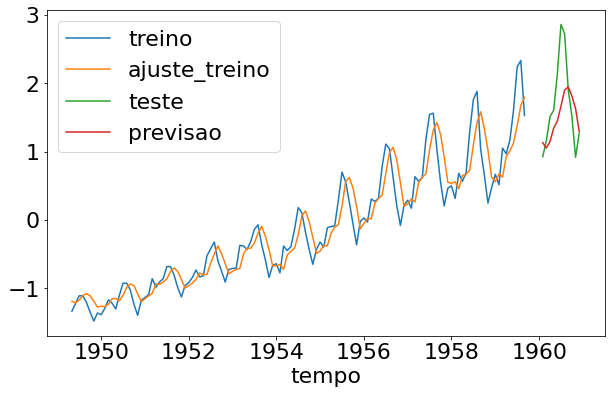

In [ ]:
sns.lineplot(x='tempo', y=ytreino_novo, data=passageiros[4:129], label='treino')
sns.lineplot(x='tempo', y=resultado_treino.values, data=passageiros[4:129], label = 'ajuste_treino')
sns.lineplot(x='tempo', y=yteste_novo, data=passageiros[133:144], label = 'teste')
sns.lineplot(x='tempo', y=resultado.values, data=passageiros[133:144], label='previsao')

# PARTE 2

In [1]:
bike = pd.read_csv('bicicletas.csv')
bike.head()

NameError: ignored

In [ ]:
bike['datas'] = pd.to_datetime(bike['datas'])

In [ ]:
sns.lineplot(x='datas', y='contagem', data=bike)
plt.xticks(rotation=70)

In [ ]:
sc2 = StandardScaler()
sc2.fit(bike['contagem'].values.reshape(-1,1))
y = sc2.transform(bike['contagem'].values.reshape(-1,1))
tamanho_treino = int(len(bike)*0.9)
tamanho_teste = len(bike) - tamanho_treino
ytreino = y[0:tamanho_treino]
yteste = y[tamanho_treino::]

In [ ]:
sns.lineplot(x='datas', y=ytreino[:,0], data = bike[0:tamanho_treino], label = 'treino')
sns.lineplot(x='datas', y=yteste[:,0], data = bike[tamanho_treino::], label = 'teste')
plt.xticks(rotation=70)

In [ ]:
vetor = pd.DataFrame(ytreino)[0]
vetor2 = pd.DataFrame(yteste)[0]

xtreino_novo, ytreino_novo = separa_dados(vetor, 10)
xteste_novo, yteste_novo = separa_dados(vetor2, 10)

In [ ]:
xtreino_novo = xtreino_novo.reshape((xtreino_novo.shape[0], xtreino_novo.shape[1], 1))
xteste_novo = xteste_novo.reshape((xteste_novo.shape[0], xteste_novo.shape[1], 1))

In [ ]:
from tensorflow.keras.layers import LSTM

recorrente = Sequential()
recorrente.add(LSTM(128, input_shape = (xtreino_novo.shape[1], xtreino_novo.shape[2])))
recorrente.add(Dense(units = 1))
recorrente.compile(loss='mean_squared_error', optimizer = 'RMSProp')
recorrente.summary()

In [ ]:
resultado = recorrente.fit(xtreino_novo, ytreino_novo, validation_data=(xteste_novo, yteste_novo), epochs=100)


In [ ]:
y_ajustado = recorrente.predict(xtreino_novo)

In [ ]:
sns.lineplot(x = 'datas', y = ytreino[:,0], data = bike[0:tamanho_treino], label = 'treino')
sns.lineplot(x = 'datas', y = y_ajustado[:,0], data = bike[0:15662], label = 'ajuste_treino')
plt.xticks(rotation = 70)

In [ ]:
y_predito = recorrente.predict(xteste_novo)

In [ ]:
sns.lineplot(x = 'datas', y = yteste[:,0], data = bike[tamanho_treino::], label = 'teste')
sns.lineplot(x = 'datas', y = y_predito[:,0], data = bike[tamanho_treino+10:len(bike)], label = 'previsão')
plt.xticks(rotation = 70)

In [ ]:
from tensorflow.keras.layers import GRU

recorrente_g = Sequential()
recorrente_g.add(GRU(128, input_shape=(xtreino_novo.shape[1], xtreino_novo.shape[2])))
recorrente_g.add(Dense(units=1))
recorrente_g.compile(loss='mean_squared_error', optimizer='RMSProp')
recorrente_g.summary()

In [ ]:
resultado2 = recorrente_g.fit(xtreino_novo, ytreino_novo, validation_data = (xteste_novo, yteste_novo), epochs=100)

In [ ]:
y_predito2 = recorrente_g.predict(xteste_novo)

In [ ]:
sns.lineplot(x = 'datas', y = yteste[:,0], data = bike[tamanho_treino::], label = 'teste')
sns.lineplot(x = 'datas', y = y_predito2[:,0], data = bike[tamanho_treino+10:len(bike)], label = 'previsão')
plt.xticks(rotation = 70)

In [ ]:
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])

In [ ]:
plt.plot(resultado2.history['loss'])
plt.plot(resultado2.history['val_loss'])